In [1]:
import pandas as pd
scores = pd.read_csv('Spike_Epistasis_Softmax.csv',index_col=0)
scores = scores.reset_index()
scores

,pos,reference,change,mutation
0,1,M,-0.00051,S13I
1,2,F,-0.00823,S13I
2,3,V,-0.00758,S13I
3,4,F,-0.03284,S13I
4,5,L,-0.01044,S13I
...,...,...,...,...
3814,1269,K,-0.00216,"S13I,W152C"
3815,1270,L,0.00449,"S13I,W152C"
3816,1271,H,0.00186,"S13I,W152C"
3817,1272,Y,0.00462,"S13I,W152C"


In [2]:
scores.change.max()

0.19933

In [3]:
scores.change = [score if abs(score)>0.01 else 0 for score in scores.change]

In [4]:
scores.change = scores.change.round(4)

In [5]:
scores

,pos,reference,change,mutation
0,1,M,0.0000,S13I
1,2,F,0.0000,S13I
2,3,V,0.0000,S13I
3,4,F,-0.0328,S13I
4,5,L,-0.0104,S13I
...,...,...,...,...
3814,1269,K,0.0000,"S13I,W152C"
3815,1270,L,0.0000,"S13I,W152C"
3816,1271,H,0.0000,"S13I,W152C"
3817,1272,Y,0.0000,"S13I,W152C"


<Axes: >

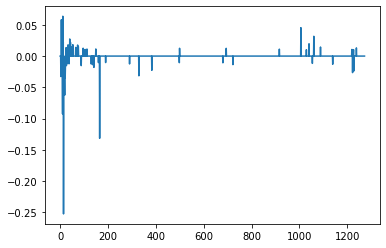

In [6]:
scores[scores.mutation == scores.mutation.unique()[0]].change.plot()

In [7]:
input_file = '6vsb_1_1_1.pdb'

In [8]:
def edit_bfactor(input_file,scores,attribute,is_mutations=False,make_positive=False):
    all_mutation_scores = []
    if is_mutations:
        for mutation in scores.mutation.unique():
            mutation_scores = scores[scores.mutation == mutation]
            all_mutation_scores.append(mutation_scores)
    else:
        all_mutation_scores.append(scores)
    for mutation_scores in all_mutation_scores:
        if is_mutations:
            mutation = mutation_scores.mutation.values[0]
        else:
            mutation = 'reference'

        if 'pos' in mutation_scores.columns:
            position_col = 'pos'
        else:
            position_col = 'position'

        lines = []
        with open(input_file, 'r') as file:
            for l in file:
                if 'ATOM' in l:
                    residue_number = int(l[22:26].split()[0])
                    change = float(mutation_scores[mutation_scores[position_col] == residue_number][attribute].values[0])
                    if make_positive:
                        change = abs(change)
                    l = l[:60] + str(round(change,2))[:6] +l[66:]
                lines.append(l)

            output_file = input_file.split('.')[0]+'_'+mutation+'_'+attribute+'_'+input_file.split('.')[1]+'.pdb'
            with open(output_file, 'w') as file:    
                for l in lines:
                    file.write(l)
                    file.write('\n')

In [9]:
scores.mutation.unique()

array(['S13I', 'W152C', 'S13I,W152C'], dtype=object)

In [10]:
from Bio.PDB import *

In [11]:
edit_bfactor(input_file,scores,'change',is_mutations=True,make_positive=False)

# Make Annotations

In [12]:
scores[(scores.change !=0) &  (scores.mutation == 'R203K')]

,pos,reference,change,mutation


In [61]:
import pyperclip

In [62]:
mutation = 'G204R'

In [13]:
import ast
import numpy as np

In [14]:
command = 'hide atoms;hide /B cartoon;hide /C cartoon;'
for i,mutation in enumerate(np.sort(scores.mutation.unique())):
    print(mutation)
    mutation_list = mutation.split(',')
    hashtag = '#'+str(i+1)
    sites = scores[(abs(scores['change']) >= 0.01) & (scores.mutation == mutation) ].pos.values.astype(str)
    command +='select '+hashtag+'/A:'+','.join(sites)+';show sel surfaces;'
command +='select subtract sel;set bgColor white;lighting flat;lighting shadows true intensity 0.5;color by bfactor palette -0.4,red:-0.05,salmon:0,white:0.05,cornflowerblue:0.4,blue;tile;'

for i,mutation in enumerate(np.sort(scores.mutation.unique())):
    mutation_list = mutation.split(',')
    hashtag = '#'+str(i+1)
    sites = [s[1:-1] for s in mutation_list]
    command +='select '+hashtag+'/A:'+','.join(sites)+';show sel surfaces;color sel yellow;'
# pyperclip.copy(command)

S13I
S13I,W152C
W152C


In [15]:
command

'hide atoms;hide /B cartoon;select #1/A:4,5,6,9,10,11,12,14,15,16,17,18,19,20,22,23,26,27,29,34,38,41,44,49,54,66,69,74,76,77,89,97,105,113,131,136,138,139,142,150,161,166,191,291,330,384,499,500,681,695,723,917,1007,1030,1041,1055,1061,1089,1140,1220,1223,1227,1228,1239;show sel surfaces;select #2/A:4,5,6,9,10,11,12,14,15,16,17,18,19,20,22,23,24,26,27,29,34,35,38,40,41,44,49,54,59,62,66,69,85,89,93,96,99,104,109,111,112,123,125,127,129,130,131,133,136,137,140,142,144,146,147,149,151,153,154,157,158,159,162,164,166,180,182,184,187,202,206,207,217,219,225,238,241,258,291,330,339,384,432,478,499,521,537,544,568,573,695,809,836,1007,1030,1041,1058,1061,1075,1080,1089,1143,1145,1147,1171,1192,1201,1202,1208,1216,1223,1224,1227,1228,1233,1239,1251;show sel surfaces;select #3/A:9,14,15,29,99,104,105,111,125,127,128,129,130,131,133,136,140,142,144,146,147,149,150,151,153,154,157,158,159,162,164,166,169,177,178,180,184,191,202,217,219,330,499,521,544,1140,1143,1145,1154,1179,1216,1223;show sel